In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename= 'PS_20174392719_1491204439457_log.csv'
DT = pd.read_csv(filename)

### Data Inspection

In [29]:
DT.info()
DT.head(10)

print('')
print('Dataset Contains Null Values: %r' % DT.isnull().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB

Dataset Contains Null Values: False


### Exploratory Data Analysis & Data Cleaning

**Data Variable:** Step
- It is unlikely that the ***step*** field is of any significant value. It appears to be a monotonically increasing numerical value for the vast majority of the dataset, which is typical of numeric ID of the transaction or the amount of time since the first data entry. 

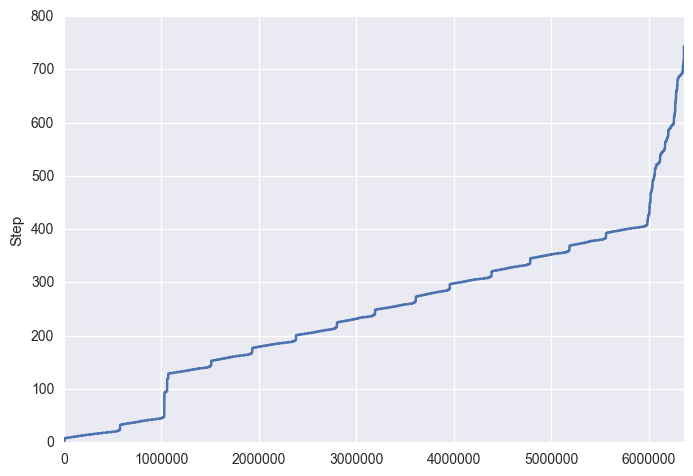

count    6.362620e+06
mean     2.433972e+02
std      1.423320e+02
min      1.000000e+00
25%      1.560000e+02
50%      2.390000e+02
75%      3.350000e+02
max      7.430000e+02
Name: step, dtype: float64

In [10]:
DT['step'].plot()
plt.ylabel('Step')
plt.show()

DT['step'].describe()

**Data Variables:** Origin Account (nameOrig) and Destination Account (nameDest)
- The unique numbers of ***nameOrig*** and ***nameDest*** are less than the total number recorded transactions. This indicates that a subset of both account types have multiple recorded transactions within the dataset. 

- It should be noted that it is possible that there are accounts that are not shared between the 2 account types. This pattern would likely be characteristic of a real dataset.

In [17]:
print('Total Documented Transactions: %d' % len(DT['nameOrig']))
print('Number of Unique Origin Accounts: %d' % len(DT['nameOrig'].unique()))
print('Number of Unique Destination Accounts: %d' % len(DT['nameDest'].unique()))

Total Documented Transactions: 6362620
Number of Unique Origin Accounts: 6353307
Number of Unique Destination Accounts: 2722362


**Data Variables:** type , amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
- There are prominent interactions between these fields because of the natures of the transactions. 
- Once ***type*** is specified, the changes in the balances of the accounts are uniquely determined by the amount of money that is ***paid***, ***transferred***, ***cashed out***, ***cashed in***, or charged to ***debit***.


- The only information the balance fields provide that is unique to each transaction is the initial money level in the accounts before the transaction occurs. Based on this, it may be useful to eliminate the '*newbalance*' fields.

In [20]:
print(DT['type'].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
